<a href="https://colab.research.google.com/github/Calabras/obrabotka_izobrajheniy/blob/main/DE_IP_2024_Task_2_Shilin_ND_3823B1PR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [3]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

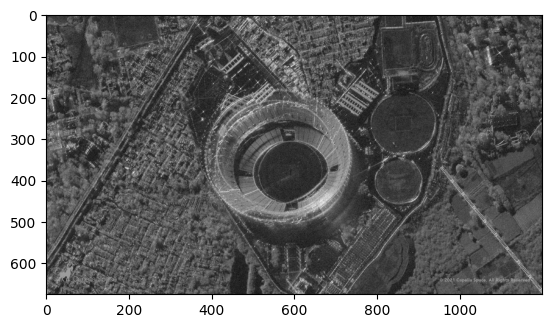

In [4]:
plt.imshow(image_gray, cmap="gray")

In [5]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,  16,   0, ..., 111,   0,  80],
       [  1, 104,  68, ...,   0, 103,   0],
       [  0,   0,  51, ...,   0,   0, 145],
       ...,
       [  0,   0,  39, ..., 255,   0,  15],
       [  0,  34,   0, ...,   0,   5, 135],
       [160, 204,   0, ...,  21,   0, 109]], dtype=uint8)

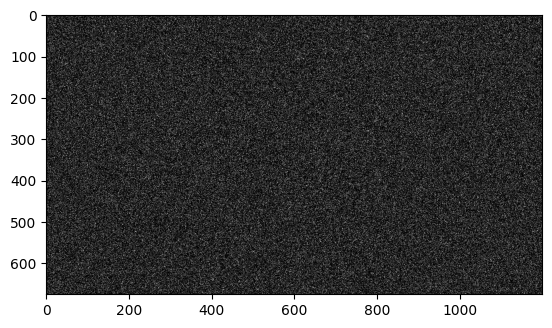

In [6]:
plt.imshow(noise_gauss, cmap="gray")

In [7]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [8]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [9]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

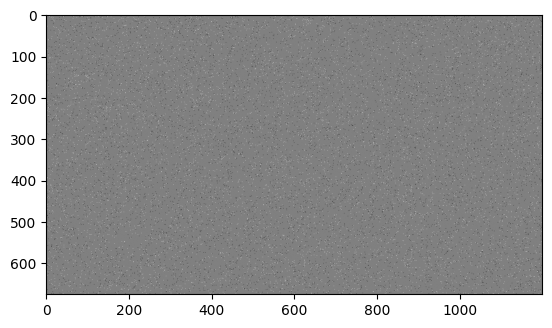

In [10]:
plt.imshow(bg_image, cmap="gray")

In [11]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

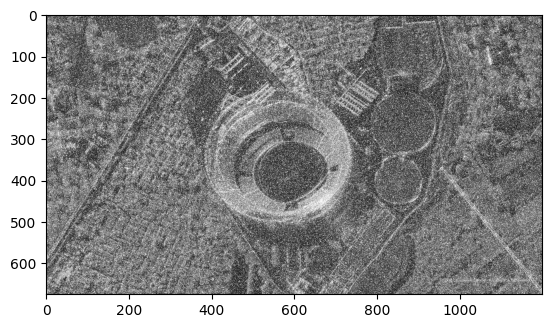

In [12]:
plt.imshow(image_noise_gauss, cmap="gray")

In [13]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4230.673058024691 0.1869926680003536


In [14]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [15]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [16]:
print(mse_gauss_median, ssim_gauss_median)

1038.0453432098766 0.4282430571563417


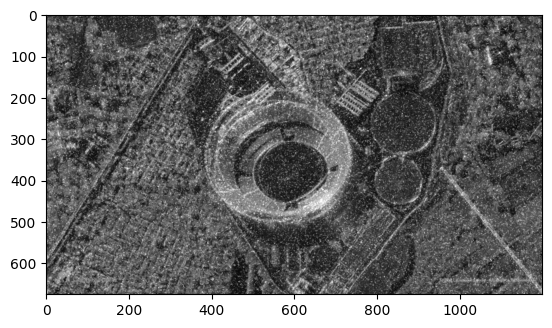

In [17]:
plt.imshow(image_gauss_median, cmap="gray")

In [18]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

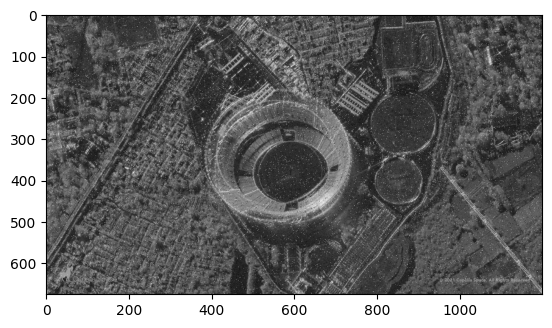

In [19]:
plt.imshow(image_sp, cmap="gray")

In [20]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

398.0764802469136 0.7169742087435559


In [21]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [22]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.73281481481482 0.8162516889831544


# Другие типы фильтров

In [23]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [24]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [25]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [26]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res

res = proc(image_noise_gauss, geom)


/tmp/ipython-input-164976186.py:8: RuntimeWarning: overflow encountered in scalar multiply
  prod1 *= a[i,j]


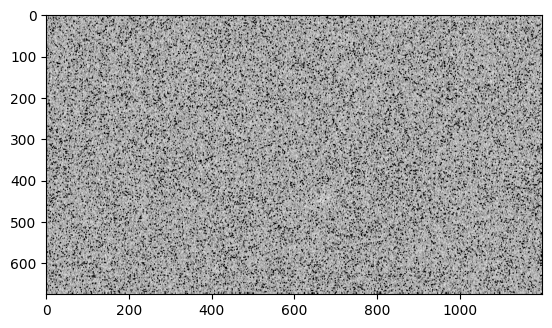

In [27]:
plt.imshow(res, cmap="gray")

In [28]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

6551.976648148148 0.02746126776511091



# 2D свертка

In [29]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [30]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [31]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [32]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl)

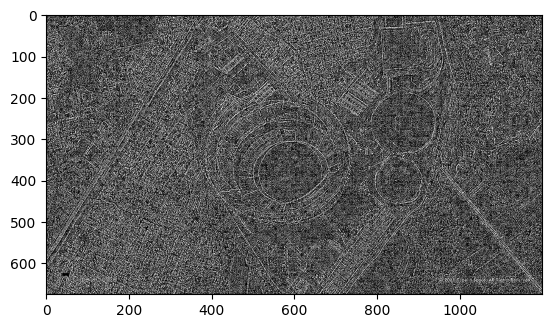

In [33]:
plt.imshow(image_lapl, cmap="gray")

In [34]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

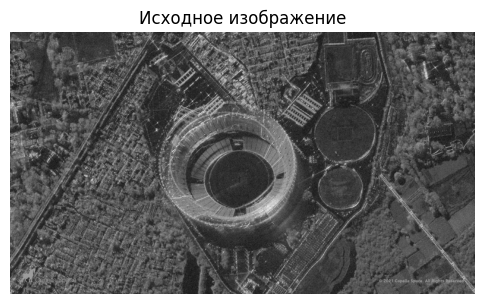

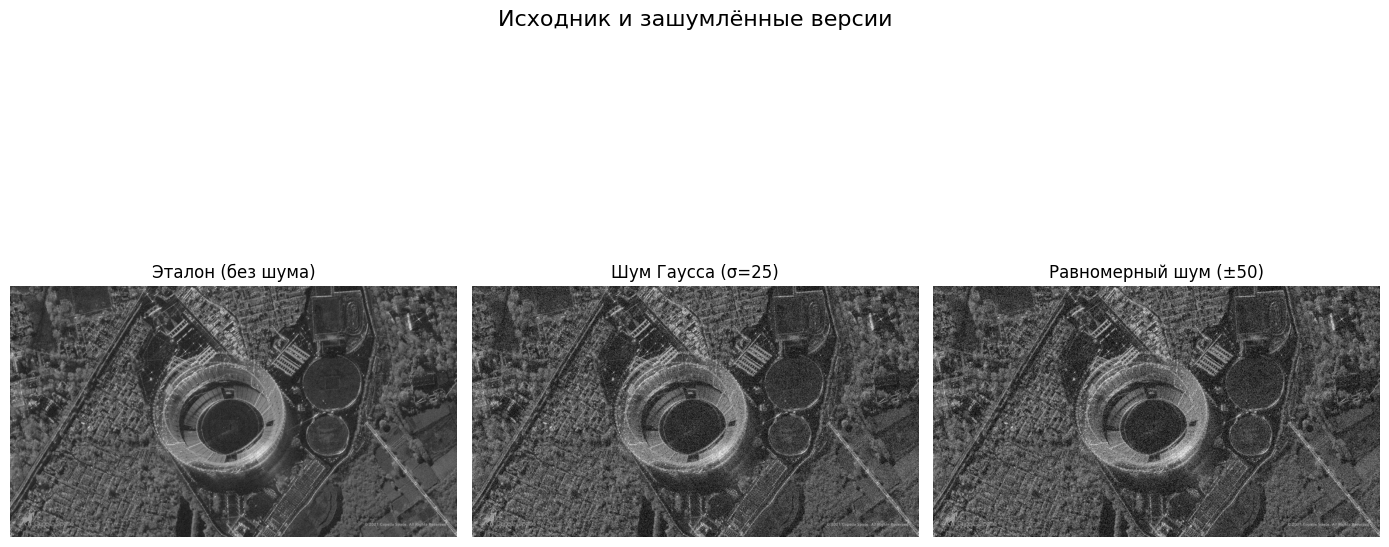

Фильтрация для шума Гаусса
Медианный (ядро 3×3) — PSNR: 24.91 дБ | SSIM: 0.6379
Медианный (ядро 5×5) — PSNR: 24.33 дБ | SSIM: 0.5607
Гауссовский (ядро 3×3, σ=1) — PSNR: 26.35 дБ | SSIM: 0.7211
Гауссовский (ядро 5×5, σ=1.5) — PSNR: 25.53 дБ | SSIM: 0.6599
Гауссовский (ядро 7×7, σ=2.0) — PSNR: 24.62 дБ | SSIM: 0.5839
Билатеральный (d=5, σC=50, σS=50) — PSNR: 26.01 дБ | SSIM: 0.7034
Билатеральный (d=9, σC=75, σS=75) — PSNR: 25.09 дБ | SSIM: 0.6130
Нелокальных средних (h=10, шаблон=7, поиск=21) — PSNR: 20.28 дБ | SSIM: 0.4810
Нелокальных средних (h=20, шаблон=7, поиск=21) — PSNR: 25.54 дБ | SSIM: 0.6661

— Итог по метрикам —
ЛУЧШЕЕ по PSNR: Гауссовский с параметрами {'ksize': 3, 'sigma': 1} | PSNR = 26.35 дБ | SSIM = 0.7211
ЛУЧШЕЕ по SSIM: Гауссовский с параметрами {'ksize': 3, 'sigma': 1} | PSNR = 26.35 дБ | SSIM = 0.7211


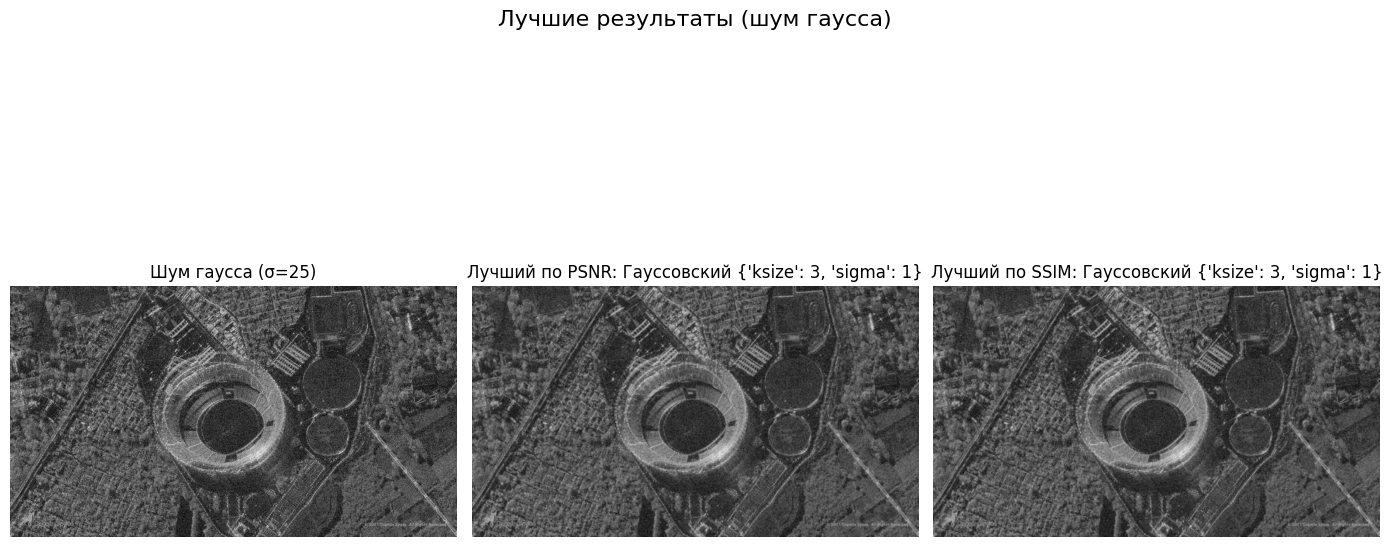


Фильтрация для равномерного шума
Медианный (ядро 3×3) — PSNR: 23.20 дБ | SSIM: 0.5433
Медианный (ядро 5×5) — PSNR: 23.60 дБ | SSIM: 0.5086
Гауссовский (ядро 3×3, σ=1) — PSNR: 25.63 дБ | SSIM: 0.6851
Гауссовский (ядро 5×5, σ=1.5) — PSNR: 25.29 дБ | SSIM: 0.6441
Гауссовский (ядро 7×7, σ=2.0) — PSNR: 24.52 дБ | SSIM: 0.5769
Билатеральный (d=5, σC=50, σS=50) — PSNR: 24.70 дБ | SSIM: 0.6430
Билатеральный (d=9, σC=75, σS=75) — PSNR: 24.93 дБ | SSIM: 0.6101
Нелокальных средних (h=10, шаблон=7, поиск=21) — PSNR: 18.98 дБ | SSIM: 0.4155
Нелокальных средних (h=20, шаблон=7, поиск=21) — PSNR: 23.60 дБ | SSIM: 0.6127

— Итог по метрикам —
ЛУЧШЕЕ по PSNR: Гауссовский с параметрами {'ksize': 3, 'sigma': 1} | PSNR = 25.63 дБ | SSIM = 0.6851
ЛУЧШЕЕ по SSIM: Гауссовский с параметрами {'ksize': 3, 'sigma': 1} | PSNR = 25.63 дБ | SSIM = 0.6851


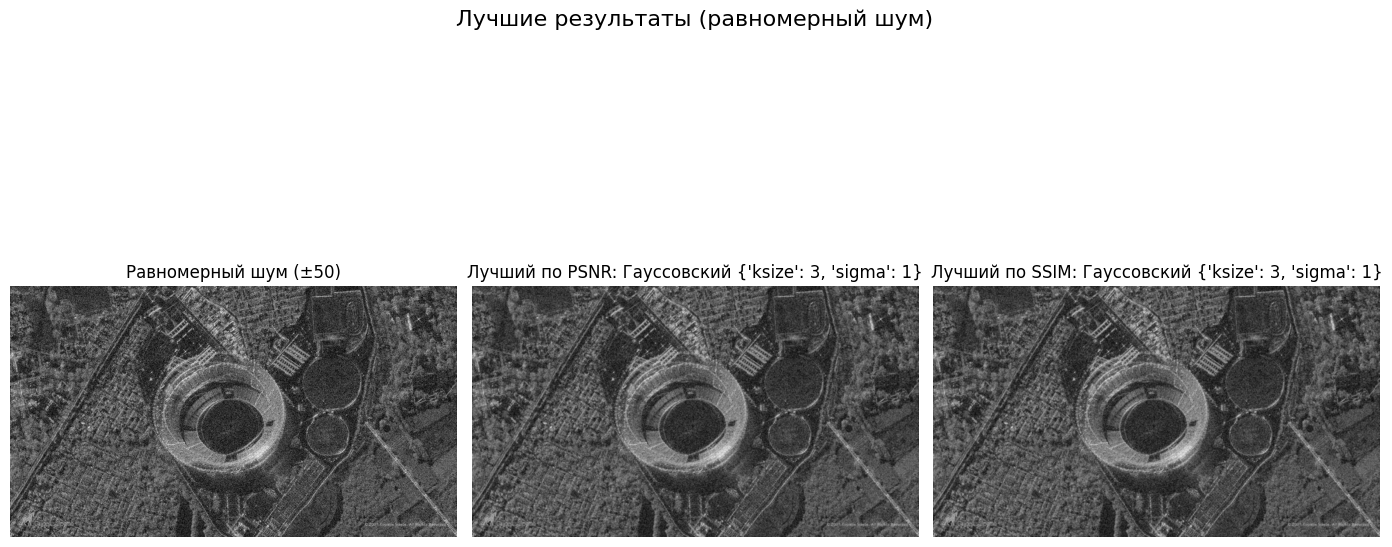


Выводы по выполненой работе
Для шума гаусса в большинстве случаев хорошо работают гауссовский/НЛС;
медианный — заметно полезен против импульсного шума («соль-перец»);
билатеральный балансирует сглаживание и сохранение границ, но требует подбора d, σC, σS;
окончательный выбор — по высоким SSIM/PSNR при приемлемой визуальной резкости.


In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

#рандомные значения
def set_seed(seed=42):
    np.random.seed(seed)

#одноканальное (градации серого) изображение
def show_gray(img, title='', size=(6, 6)):
    plt.figure(figsize=size)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.show()

#сеточное отображение нескольких изображений в оттенках серого
def plot_pairs(imgs, titles, cols=3, suptitle=None, size=(14, 8)):
    rows = int(np.ceil(len(imgs) / cols))
    plt.figure(figsize=size)
    if suptitle:
        plt.suptitle(suptitle, fontsize=16)
    for i, (im, ttl) in enumerate(zip(imgs, titles), start=1):
        plt.subplot(rows, cols, i)
        plt.imshow(im, cmap='gray', vmin=0, vmax=255)
        plt.title(ttl)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

#пиковое отношение шума между эталоном и тестовым изображением
def psnr(img_ref_u8, img_test_u8):
    a = img_ref_u8.astype(np.float64)
    b = img_test_u8.astype(np.float64)
    mse = np.mean((a - b) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    return 20.0 * np.log10(max_pixel / np.sqrt(mse))

#метрики PSNR и SSIM между эталоном и тестовым изображением
def compare_images(img_ref_u8, img_test_u8, label=''):
    a = img_ref_u8.astype(np.float64)
    b = img_test_u8.astype(np.float64)
    data_range = float(max(a.max(), b.max()) - min(a.min(), b.min()))
    if data_range == 0:
        data_range = 1.0
    psnr_val = psnr(img_ref_u8, img_test_u8)
    ssim_val = ssim(a, b, data_range=data_range)
    print(f'{label} — PSNR: {psnr_val:.2f} дБ | SSIM: {ssim_val:.4f}')
    return psnr_val, ssim_val

#аддитивный гауссов шум с нулевым средним и СКО = sigma
def add_gaussian_noise(gray_u8, sigma):
    g = gray_u8.astype(np.float32)
    noise = np.random.normal(loc=0.0, scale=float(sigma), size=g.shape).astype(np.float32)
    noised = np.clip(g + noise, 0, 255).astype(np.uint8)
    return noised

#аддитивный равномерный («постоянный») шум в диапазоне [-A, +A]
def add_uniform_noise(gray_u8, amplitude):
    g = gray_u8.astype(np.float32)
    noise = np.random.uniform(low=-float(amplitude), high=float(amplitude), size=g.shape).astype(np.float32)
    noised = np.clip(g + noise, 0, 255).astype(np.uint8)
    return noised

#соль-перец (дополнительно)
def add_salt_pepper(gray_u8, prob=0.05):
    out = gray_u8.copy()
    mask = np.random.rand(*gray_u8.shape)
    out[mask < (prob / 2.0)] = 0
    out[mask > 1.0 - (prob / 2.0)] = 255
    return out

#медианный фильтр
def filt_median(gray_u8, ksize):
    return cv2.medianBlur(gray_u8, int(ksize))

#гауссовский фильтр
def filt_gaussian(gray_u8, ksize, sigma):
    k = (int(ksize), int(ksize))
    return cv2.GaussianBlur(gray_u8, k, float(sigma))

#билатеральный фильтр
def filt_bilateral(gray_u8, d, sigma_color, sigma_space):
    return cv2.bilateralFilter(gray_u8, int(d), float(sigma_color), float(sigma_space))

#фильтр нелокальных средних
def filt_nlm(gray_u8, h, template_window=7, search_window=21):
    return cv2.fastNlMeansDenoising(gray_u8, None, float(h), int(template_window), int(search_window))

#наборы параметров для каждого фильтра и результаты
def evaluate_filters(original_u8, noisy_u8,
                     median_ks=(3, 5, 7),
                     gauss_ks_sigma=((3,1), (5,1.5), (7,2.0)),
                     bilateral_params=((5, 50, 50), (9, 75, 75), (11, 100, 100)),
                     nlm_params=((10, 7, 21), (20, 7, 21), (30, 7, 21))):
    results = []

    for k in median_ks:
        den = filt_median(noisy_u8, k)
        p, s = compare_images(original_u8, den, label=f'Медианный (ядро {k}×{k})')
        results.append(('Медианный', {'ksize': k}, p, s, den))

    for k, sg in gauss_ks_sigma:
        den = filt_gaussian(noisy_u8, k, sg)
        p, s = compare_images(original_u8, den, label=f'Гауссовский (ядро {k}×{k}, σ={sg})')
        results.append(('Гауссовский', {'ksize': k, 'sigma': sg}, p, s, den))

    for d, sc, ss in bilateral_params:
        den = filt_bilateral(noisy_u8, d, sc, ss)
        p, s = compare_images(original_u8, den, label=f'Билатеральный (d={d}, σC={sc}, σS={ss})')
        results.append(('Билатеральный', {'d': d, 'sigma_color': sc, 'sigma_space': ss}, p, s, den))

    for h, tw, sw in nlm_params:
        den = filt_nlm(noisy_u8, h, tw, sw)
        p, s = compare_images(original_u8, den, label=f'Нелокальных средних (h={h}, шаблон={tw}, поиск={sw})')
        results.append(('Нелокальных средних', {'h': h, 'template': tw, 'search': sw}, p, s, den))

    best_psnr = max(results, key=lambda x: x[2])
    best_ssim = max(results, key=lambda x: x[3])

    print('\n— Итог по метрикам —')
    print(f'ЛУЧШЕЕ по PSNR: {best_psnr[0]} с параметрами {best_psnr[1]} | PSNR = {best_psnr[2]:.2f} дБ | SSIM = {best_psnr[3]:.4f}')
    print(f'ЛУЧШЕЕ по SSIM: {best_ssim[0]} с параметрами {best_ssim[1]} | PSNR = {best_ssim[2]:.2f} дБ | SSIM = {best_ssim[3]:.4f}')

    return {
        'best_psnr': best_psnr,
        'best_ssim': best_ssim,
        'all_results': results
    }

set_seed(123)
image_path = 'sar_1.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f'Не удалось загрузить файл: {image_path}')
show_gray(img, 'Исходное изображение')

#зашумление: гауссовский и равномерный шум
sigma_gauss = 25
amp_unif  = 50

img_gn = add_gaussian_noise(img, sigma=sigma_gauss)
img_un = add_uniform_noise(img, amplitude=amp_unif)

plot_pairs(
    [img, img_gn, img_un],
    ['Эталон (без шума)', f'Шум Гаусса (σ={sigma_gauss})', f'Равномерный шум (±{amp_unif})'],
    cols=3, suptitle='Исходник и зашумлённые версии'
)

print('Фильтрация для шума Гаусса')
res_gn = evaluate_filters(
    original_u8=img,
    noisy_u8=img_gn,
    median_ks=(3, 5),
    gauss_ks_sigma=((3, 1), (5, 1.5), (7, 2.0)),
    bilateral_params=((5, 50, 50), (9, 75, 75)),
    nlm_params=((10, 7, 21), (20, 7, 21))
)

best_gn_psnr = res_gn['best_psnr']
best_gn_ssim = res_gn['best_ssim']
plot_pairs(
    [img_gn, best_gn_psnr[4], best_gn_ssim[4]],
    [
        f'Шум гаусса (σ={sigma_gauss})',
        f'Лучший по PSNR: {best_gn_psnr[0]} {best_gn_psnr[1]}',
        f'Лучший по SSIM: {best_gn_ssim[0]} {best_gn_ssim[1]}'
    ],
    cols=3, suptitle='Лучшие результаты (шум гаусса)'
)

print('\nФильтрация для равномерного шума')
res_un = evaluate_filters(
    original_u8=img,
    noisy_u8=img_un,
    median_ks=(3, 5),
    gauss_ks_sigma=((3, 1), (5, 1.5), (7, 2.0)),
    bilateral_params=((5, 50, 50), (9, 75, 75)),
    nlm_params=((10, 7, 21), (20, 7, 21))
)

best_un_psnr = res_un['best_psnr']
best_un_ssim = res_un['best_ssim']
plot_pairs(
    [img_un, best_un_psnr[4], best_un_ssim[4]],
    [
        f'Равномерный шум (±{amp_unif})',
        f'Лучший по PSNR: {best_un_psnr[0]} {best_un_psnr[1]}',
        f'Лучший по SSIM: {best_un_ssim[0]} {best_un_ssim[1]}'
    ],
    cols=3, suptitle='Лучшие результаты (равномерный шум)'
)

#выводы
print('\nВыводы по выполненой работе')
print('Для шума гаусса в большинстве случаев хорошо работают гауссовский/НЛС;')
print('медианный — заметно полезен против импульсного шума («соль-перец»);')
print('билатеральный балансирует сглаживание и сохранение границ, но требует подбора d, σC, σS;')
print('окончательный выбор — по высоким SSIM/PSNR при приемлемой визуальной резкости.')
